In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [303]:
POPULATION_SIZE = 500_000
BOARD_SIZE = 8

In [373]:
class Population():
    
    def __init__(self, N=BOARD_SIZE):
        self.N = N
        self.population = np.array(np.random.randint(low=0, 
                                                     high=self.N, 
                                                     size=(POPULATION_SIZE,self.N,2)))
        
    def get_population_size(self):
        return self.population.shape[0]
    
    def get_population_fitnesses(self):
        return [self.f_fitness(i) for i in self.population]
    
    def mate(self):
        mated = []
        for p in self.population:
            if self.f_fitness(p)<5:
                mated.append(p)
        del self.population
        self.population = np.array(mated)
    
    def mutate(self):
        for p in self.population:
            p[np.random.randint(low=0, high=BOARD_SIZE)] = (p[np.random.randint(low=0, high=BOARD_SIZE)] + 1) % BOARD_SIZE
    
    def crossover(self):
        for p1, p2 in zip(self.population[::2],self.population[1::2]):
            for idx in range(len(p1))[::2]:
                p1[idx], p2[idx] = p2[idx], p1[idx]
    
    def f_fitness(self, ind):
        result = 0
        for i in range(len(ind)):
            for j in range(i+1, len(ind)):
                if ind[i,0]==ind[j,0] or ind[i,1]==ind[j,1] or abs(ind[i,0]-ind[j,0])==abs(ind[i,1]-ind[j,1]):
                    result += 1
        return result
    
    def draw(self):
        try:
            plt.scatter(self.population[:,0], self.population[:,1])
            plt.show()
        except:
            print("Can not draw a picture")
    

In [374]:
population = Population()

In [375]:
population.get_population_size()

500000

In [376]:
a = population.get_population_fitnesses()
np.bincount(a), np.unique(a), np.bincount(a).shape, np.unique(a).shape

(array([    0,     0,    32,   335,  1768,  6684, 18212, 35954, 57237,
        73038, 77720, 71755, 57174, 40675, 26709, 15619,  8705,  4298,
         2196,  1025,   502,   186,   102,    44,    23,     5,     2]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26]),
 (27,),
 (25,))

In [377]:
np.where(np.array(a)==1)[0], np.where(np.array(a)==0)[0]

(array([], dtype=int64), array([], dtype=int64))

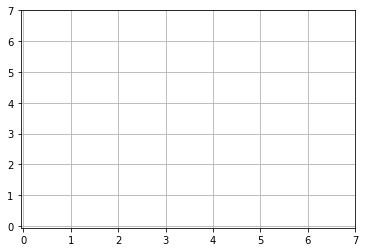

In [384]:
idxs = np.where(np.array(a)==1)[0]
if len(idxs)>1:
    fig, ax = plt.subplots(1,len(idxs), figsize=(20, 4))
    for i, idx in enumerate(idxs):
        ax[i].scatter(population.population[idx,:,0], population.population[idx,:,1])
        ax[i].grid(True)
        ax[i].set_xticks(range(BOARD_SIZE))
        ax[i].set_yticks(range(BOARD_SIZE))
else:
    plt.scatter(population.population[idxs,:,0], population.population[idxs,:,1])
    plt.grid(True)
    plt.xticks(range(BOARD_SIZE))
    plt.yticks(range(BOARD_SIZE))
    
    
plt.show()

In [385]:
population.population[idxs,:,0], population.population[idxs,:,1]

(array([], shape=(0, 8), dtype=int64), array([], shape=(0, 8), dtype=int64))

In [386]:
population.mate()

In [387]:
population.get_population_size()

196

In [403]:
a = population.get_population_fitnesses()
np.bincount(a), np.unique(a), np.bincount(a).shape, np.unique(a).shape

(array([ 0,  0,  0,  0,  1,  4,  7, 18, 28, 31, 34, 20, 22,  8, 11,  3,  7,
         1,  0,  1]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19]),
 (20,),
 (15,))

In [401]:
population.crossover()

In [402]:
population.mutate()

In [382]:
population.get_population_size()

2135

In [332]:
a = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])

In [333]:
a

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

In [334]:
for i, (i1, i2) in enumerate(zip(a[::2],a[1::2])):
    i1[0], i2[0] = i2[0], i1[0]

In [335]:
a

array([[2, 1],
       [1, 2],
       [4, 3],
       [3, 4],
       [5, 5]])